<a href="https://colab.research.google.com/github/rhamiro94/AprendizajeSupervisado/blob/master/Entregable_ASupervisado_grupo8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entregable Práctico - Aprendizaje Supervisado 


*Consignas*

https://github.com/DiploDatos/AprendizajeSupervisado/tree/master/practico

# 1) Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Apertura del dataset desde Google Drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

def connect_to_drive():
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  return GoogleDrive(gauth)

def read_csv_from_drive(drive, id, filename):
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile(filename)  
  return pd.read_csv(filename)

drive = connect_to_drive()  # utilización de la función de apertura de archivos desde drive

In [ ]:
# Lectura train
train = read_csv_from_drive(drive, '1gxrJGBaG7hYDp_p15Sfb0COjvry_8-HD', 'travel_insurance_prediction_train.csv') # el 2° parámetro es el id del archivo (terminación del link en drive)

train.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1,33,Private Sector/Self Employed,Yes,550000,6,0,No,No,1
1,2,28,Private Sector/Self Employed,Yes,800000,7,0,Yes,No,0
2,3,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0
3,4,31,Government Sector,No,300000,7,0,No,No,0
4,5,28,Private Sector/Self Employed,Yes,1250000,3,0,No,No,0


In [ ]:
# Lectura test
test = read_csv_from_drive(drive, '1d55KFGEszvA0FFGqbO6iAlIZytADoP01', 'travel_insurance_prediction_test.csv')

test.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,1491,29,Private Sector/Self Employed,Yes,1100000,4,0,No,No
1,1492,28,Private Sector/Self Employed,Yes,750000,5,1,Yes,No
2,1493,31,Government Sector,Yes,1500000,4,0,Yes,Yes
3,1494,28,Private Sector/Self Employed,Yes,1400000,3,0,No,Yes
4,1495,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes


El dataset consiste en datos de una Agencia de Turismo que ofrece paquetes de seguro de viaje a sus clientes. Las variables que incluye son: 

* `Age`: Edad del cliente. 
* `Employment Type`: Sector al que pertenece el empleo del cliente. 
* `GraduateOrNot`: "Yes" si el cliente se graduó o "No" en caso contrario. 
* `AnnualIncome`: Ingreso anual del cliente, medido en rupias indias. 
* `FamilyMembers`: número de miembros en la familia del cliente. 
* `ChronicDisease`: si el cliente sufre de una enfermedad crónica o condición. 
* `FrequentFlyer`: "Yes" si el cliente es viajero frecuento y "No" si no lo es. Esto se basa en el historial de compra de pasajes aereos. 
* `EverTravelledAbroad`: "Yes" si el cliente ha viajado al extranjero (no necesariamente utilizando los servicios de esta compañia) y "No" en caso contrario. 
* `TravelInsurance`: Variable objetivo. "Yes" si el cliente ha comprado el paquete de seguro de viaje y "No" si no lo ha hecho. 

A partir de aqui se trabajará con el dataset de train ya que contiene información de todas las variables mencionadas (en test no contamos con la variable target `TravelInsurance`). 

In [ ]:
# Tipo de datos:
train.dtypes

Customer                int64
Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [ ]:
#Dimensión del dataset
train.shape

(1490, 10)

In [ ]:
#Numero de valores nulos
train.isna().sum()

Customer               0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [ ]:
#Analizamos la variable objetivo
#Para ello utilizamos la base de entrenamiento "Train" que contiene datos para esta variable.
#A fines expositivos crearemos una df_train que contenga solo a nuestra variable objetivo pero con etiquetas distintas.
s_train=train['TravelInsurance']
df_train=s_train.to_frame(name='Seg_viaje')

In [ ]:
#Hago el cambio de dicotómicas a cualitativas
# Si: 1 , No : 0
df_train['Seg_viaje'] = df_train['Seg_viaje'].map({1:'SI', 0:'NO'})

In [ ]:
#Este nuevo data frame lo creo para poder graficar el comportamiento de la variable objetivo como refleja la misma
#info que el conjunto de datos train pero con otras etiquetas no modifica el resutlado.
df_train

,Seg_viaje
0,SI
1,NO
2,NO
3,NO
4,NO
...,...
1485,NO
1486,NO
1487,NO
1488,NO


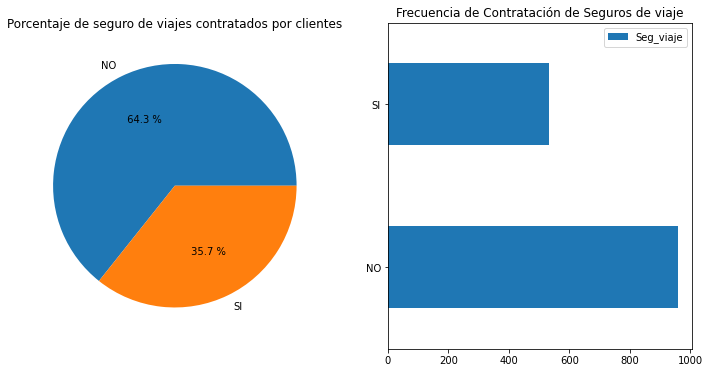

In [ ]:
#Gráfico de Torta (izquierda)
fig, axs = plt.subplots(ncols= 2, figsize=(12 ,6))
plt.subplot(121)
pie = plt.pie(df_train["Seg_viaje"].value_counts(), labels= ["NO","SI"], 
autopct = '% 1.1f %%')
plt.title("Porcentaje de seguro de viajes contratados por clientes")

#Gráfico de Barras Horizontales (derecha)
plt.subplot(122)
df_train["Seg_viaje"].value_counts().plot.barh()

plt.title("Frecuencia de Contratación de Seguros de viaje")
plt.legend()
plt.show()

Podemos observar que la mas de la mitad de los clientes no contrataron un seguro de viaje durante 2019, mientras que apenas un 35% de los mismos si lo hizo.

In [ ]:
#Analizamos nuestras variables numéricas
#Volvemos a trabajar sobre nuestra base df sin nuestra variable objetivo.
df_x=train.drop("TravelInsurance", axis=1)
df_x.select_dtypes(include=['float64', 'int']).describe()

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases
count,1490.000000,1490.000000,1.490000e+03,1490.000000,1490.000000
mean,745.500000,29.667114,9.278188e+05,4.777181,0.275839
std,430.270264,2.880994,3.811715e+05,1.640248,0.447086
min,1.000000,25.000000,3.000000e+05,2.000000,0.000000
25%,373.250000,28.000000,6.000000e+05,4.000000,0.000000
50%,745.500000,29.000000,9.000000e+05,5.000000,0.000000
75%,1117.750000,32.000000,1.250000e+06,6.000000,1.000000
max,1490.000000,35.000000,1.800000e+06,9.000000,1.000000


Resulta util analizar algunas metricas descriptivas para ambos grupos, las personas que si contratan el seguro y las personas que no lo hacen con el objetivo de encontrar alguna variable significativamente distinta entre ambos grupos que explique la contratación o no del mismo (aunque para esto se requerirán más análisis). 

La unica variable que llama la atención es AnnualIncome ya que, en promedio, es un 38% mayor en el grupo que contrato el seguro. El resto de las variables son similares en ambos grupos. 

In [ ]:
train.groupby("TravelInsurance").describe().round()

Customer                            ... ChronicDiseases                    
                   count   mean    std  min    25%  ...             min  25%  50%  75%  max
TravelInsurance                                     ...                                    
0                  958.0  756.0  431.0  2.0  380.0  ...             0.0  0.0  0.0  1.0  1.0
1                  532.0  727.0  428.0  1.0  355.0  ...             0.0  0.0  0.0  1.0  1.0

[2 rows x 40 columns]

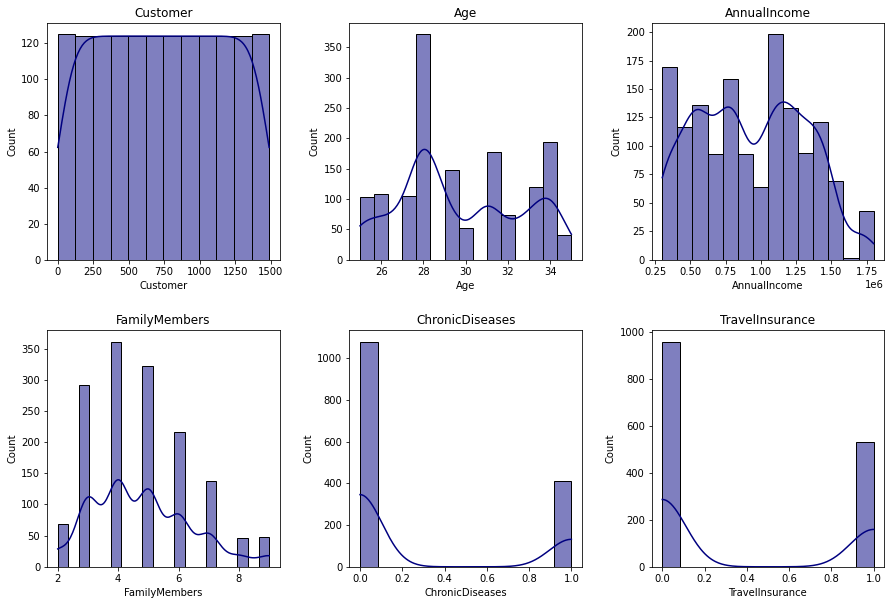

In [ ]:
#Definimos columnas a graficar
col_num=list(train.select_dtypes(include=['float64', 'int']).columns)


#Valores Nulos.#Ver si vale la pena hacer el comentario.
row = 2
col = 3
i = 1 # inicia el conteo

fig = plt.figure(figsize=(15,10))

for columna in col_num:
  plt.subplot(row, col, i)
  plt.title(columna)
  sns.histplot(data= train,
              x= columna,
              stat= "count",
              color= "navy", kde=True)
  i += 1


plt.subplots_adjust(wspace = 0.3, hspace = 0.3) 
plt.show()

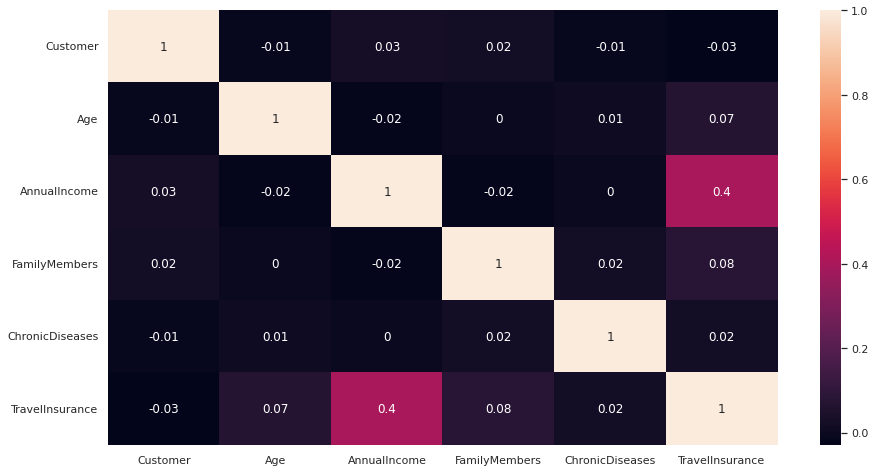

In [ ]:
#Analizamos matriz de correlaciones
#Configuro tamaño
sns.set(rc = {'figure.figsize':(15,8)})
# Defino matriz
correlation_matrix = train.corr().round(2)
# Grafico matriz generada
sns.heatmap(data=correlation_matrix, annot=True) # annot = True me permite imprimir valores.

En linea con lo observado en la tabla de estadisticas descriptivas, la variable que mayor relación tiene con la variable objetivo es AnualIncome aunque con un valor de 0.4, lo cual no es muy fuerte dicha relación. Esta es positiva, lo que indicaria que es mas probable que las personas de mayor ingreso anual contraten un seguro de viaje. El resto de las variables tienen una correlación cercana a 0, y de hecho, lo que se observaba en la tabla anterior era que no diferian en ambos grupos. 

In [ ]:
#Analizamos variables no numéricas.
train.select_dtypes(include=['object']).describe()

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1490,1490,1490,1490
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1057,1268,1173,1202


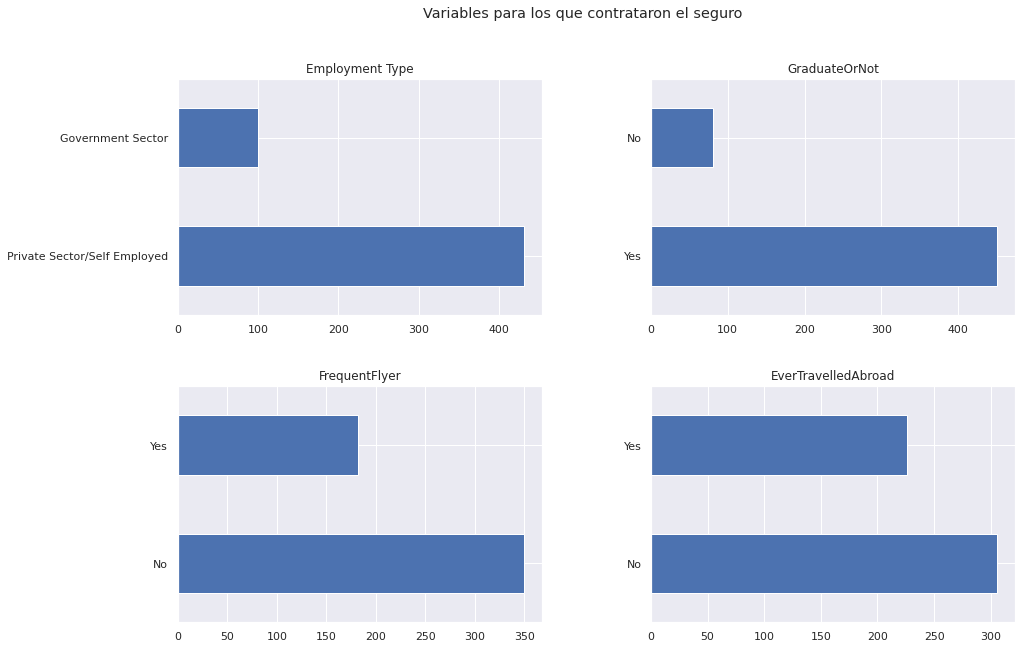

In [ ]:
#Definimos columnas a graficar
col_nonum=list(train.select_dtypes(include=['object']).columns)
df_yes = train[train["TravelInsurance"] == 1]

row = 2
col = 2
i = 1 # inicia el conteo

fig = plt.figure(figsize=(15,10))
fig.suptitle('Variables para los que contrataron el seguro')

for columna in col_nonum:
  plt.subplot(row, col, i)
  plt.title(columna)
  df_yes[columna].value_counts().plot.barh()         
  i += 1

plt.subplots_adjust(wspace = 0.3, hspace = 0.3) 
plt.show()

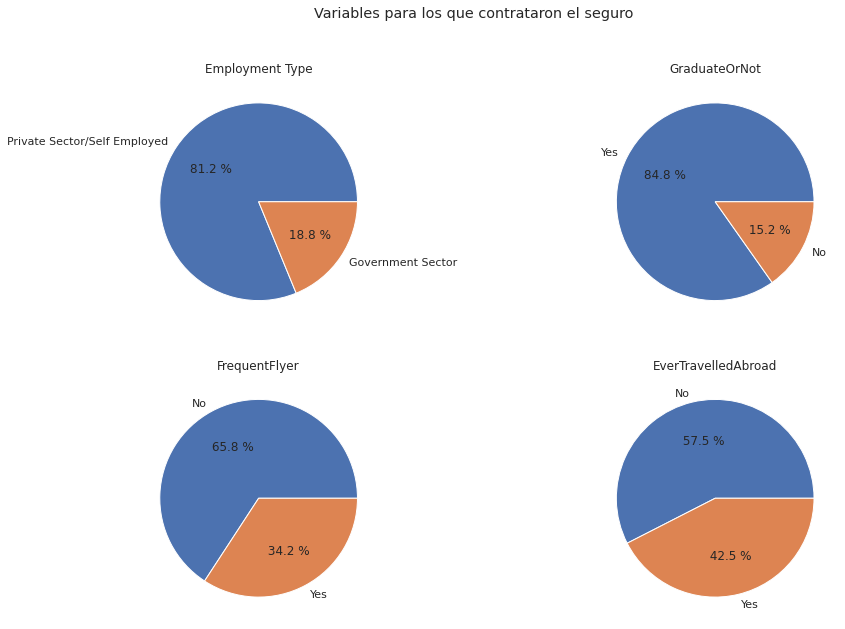

In [ ]:
#Gráfico de Torta (izquierda)
row = 2
col = 2
i = 1 # inicia el conteo
fig = plt.figure(figsize=(15,10))
fig.suptitle('Variables para los que contrataron el seguro')
for columna in col_nonum:
  plt.subplot(row, col, i)
  plt.title(columna)
  plt.pie(df_yes[columna].value_counts(), labels= df_yes[columna].unique(), autopct = '% 1.1f %%')
  i += 1

En cuanto a las variables categoricas, se observa que las personas que contratan seguros:
* El 81.2% pertenece al sector privado. Si analizamos el ingreso anual promedio de las personas en ambos sectores, vemos que quienes tienen sus empleos en el sector privado registran un ingreso anual promedio de 1.184.259 rupias indias mientras que en el sector publico se registran 896.000. 
* El 84.8% se ha graduado. En este caso, la relación con la variable AnnualIncome es similar.
* El 65.8% no es viajero frecuente. 
* El 57.5% no ha viajado nunca antes al exterior. 

Estas ultimas parecen estar relacionadas con la precaución/desconocimiento de los viajeros que no han realizado muchos viajes previamente, por lo que suelen tomar más precauciones al momento de realizar un viaje. Si bien el porcentaje que acceden a seguros no es tan alto como en las variables anteriores, resulta interesante incluirlos en el modelo a utilizar.  

# 2) Modelos

El modelo Baseline de la competencia de Kaggle es un árbol de decisión. El objetivo de esta sección es generar 3 modelos adicionales que intenten superar el F1 Score de la clase positiva del modelo baseline. 

Se presentan a continuación los 3 mejores modelos que entregamos en la competencia de Kaggle. 

Tomando como referencia el Private Score, los 3 mejores modelos que entregamos en la competencia de Kaggle son:

1. SVC (0.69 F1Score)
2. XGBoost (0.69 F1Score)
3. RandomForest (0.67 F1Score) 
 

## 2.1 Modelo Baseline : Tree Clasifier

Modelo generado por la materia con el objetivo de superar su F1 Score. 

In [ ]:
from sklearn.compose import make_column_transformer # Genera transformacion sobre columnas
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder # KBins se utiliza para discretizar valores numericos
from sklearn.tree import DecisionTreeClassifier

In [ ]:
transformer = make_column_transformer(
    (KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile"), ["Age", "AnnualIncome"]),
    (OneHotEncoder(categories="auto", dtype="int", handle_unknown="ignore"),
     ["Employment Type", "GraduateOrNot", "FamilyMembers", "FrequentFlyer", "EverTravelledAbroad"]),
    remainder="passthrough") 

In [ ]:
# The data for training the model
X_train = transformer.fit_transform(train.drop(columns=["Customer", "TravelInsurance"]))
y_train = train["TravelInsurance"].values

# The test data is only for generating the submission
X_test = transformer.transform(test.drop(columns=["Customer"]))

In [ ]:
search_params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 5],
    'max_depth': [3, 6, 10]
}
tree = DecisionTreeClassifier(random_state=42)
tree_clf = GridSearchCV(tree, search_params, cv=5, scoring='f1', n_jobs=-1)
tree_clf.fit(X_train, y_train)

best_tree_clf = tree_clf.best_estimator_

In [ ]:
print(classification_report(y_train, best_tree_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       958
           1       0.86      0.66      0.75       532

    accuracy                           0.84      1490
   macro avg       0.85      0.80      0.82      1490
weighted avg       0.84      0.84      0.84      1490



## 2.2 Modelo Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
transformer = make_column_transformer(
    (KBinsDiscretizer(n_bins=6, encode="ordinal", strategy="quantile"), ["Age", "AnnualIncome"]),
    (OneHotEncoder(categories="auto", dtype="int", handle_unknown="ignore"),
    [ "Employment Type", "FamilyMembers", "ChronicDiseases", "GraduateOrNot", "EverTravelledAbroad"]),
    remainder="drop")

In [ ]:
# The data for training the model
X_train = transformer.fit_transform(train.drop(columns=["Customer", "TravelInsurance" ]))
y_train = train["TravelInsurance"].values

# The test data is only for generating the submission
X_test = transformer.transform(test.drop(columns=["Customer"]))

In [ ]:
search_params = {
    'n_estimators': [10, 30, 50, 100], # Numero de arboles incluidos en el modelo
    'criterion': ['gini', 'mse'],  
    'max_depth': [2, 5, 10, 15], # Profundidad maxima que pueden alcanzar los arboles
    'min_samples_split': [3, 5, 10], # Numero minimo de obs que debe tener un nodo para que pueda dividirse
    'min_samples_leaf':[2, 5, 10],  # Numero minimo de obs que debe tener un nodo hijo para que se produzca la division
    'max_features': ["auto", "sqrt", "log2", None]
}

forest_clf = RandomForestClassifier(random_state=42)
forest_clf = GridSearchCV(forest_clf, search_params, cv=5, scoring='f1', n_jobs=-1)
forest_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
display ('Best configuraton:')
display(forest_clf.best_params_)

best_forest_clf = forest_clf.best_estimator_

'Best configuraton:'

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}

In [ ]:
print(classification_report(y_train, best_forest_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       958
           1       0.90      0.65      0.76       532

    accuracy                           0.85      1490
   macro avg       0.87      0.81      0.82      1490
weighted avg       0.86      0.85      0.84      1490



El F1 Score es ligeramente mayor que el del modelo baseline (0.76 vs 0.75). 

## 2.3 Modelo XGBoost

Extreme Gradient Boosting es un algoritmo que entrena arboles de decisión individuales secuencialmente y se caracteriza por obtener buenos resultados de predicción con relativamente poco esfuerzo.

In [ ]:
import xgboost as xgb

In [ ]:
transformer = make_column_transformer(
    (KBinsDiscretizer(n_bins=6, encode="ordinal", strategy="quantile"), ["Age", "AnnualIncome"]),
    (OneHotEncoder(categories="auto", dtype="int", handle_unknown="ignore"),
    [ "Employment Type", "FamilyMembers", "ChronicDiseases", "GraduateOrNot", "EverTravelledAbroad"]),
    remainder="drop")

In [ ]:
# The data for training the model
X_train = transformer.fit_transform(train.drop(columns=["Customer", "TravelInsurance" ]))
y_train = train["TravelInsurance"].values

# The test data is only for generating the submission
X_test = transformer.transform(test.drop(columns=["Customer"]))

In [ ]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print(classification_report(y_train, xgb_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       958
           1       0.91      0.61      0.73       532

    accuracy                           0.84      1490
   macro avg       0.87      0.79      0.81      1490
weighted avg       0.85      0.84      0.83      1490



Con el modelo XGBoost no se logra obtener un F1 SCore de la clase 1 superior al de los modelos anteriores. 

## 2.4 SVC : Support Vector Clasiffier

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state = 42)
grilla = {"C" : [0.001, 0.1, 0.15, 0.50, 1, 10], 
          "kernel" : ["linear", "poly", "rbf", "sigmoid"]}
svc_clf = GridSearchCV(
        estimator  = svc,
        param_grid = grilla,
        cv         = 5)

svc_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.1, 0.15, 0.5, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
svc_clf.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print(classification_report(y_train, svc_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       958
           1       0.91      0.61      0.73       532

    accuracy                           0.84      1490
   macro avg       0.86      0.79      0.81      1490
weighted avg       0.85      0.84      0.83      1490



# 3. Generación de Predicciones sobre test para Submission.

In [ ]:
# Generación de predicciones sobre test para submissions: 
test_id = test["Customer"]
test_pred = svc_clf.predict(X_test)

In [ ]:
submission = pd.DataFrame(list(zip(test_id, test_pred)), columns = ["Customer", "TravelInsurance"])
submission.head()

,Customer,TravelInsurance
0,1491,0
1,1492,0
2,1493,1
3,1494,1
4,1495,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Creamos un csv con el dataframe final: 
submission.to_csv("/content/drive/My Drive/DiploDatos - FAMAF - Entregables/Aprendizaje Supervisado/submission_grupo8_svc_1.csv", header = True,index = False)

Mounted at /content/drive
